# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [3]:
# Import your libraries
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

# Challenge 1 - Generate and Plot Normal Distributions

#### Step 1: Generate samples and test normal distribution

Use mean=50, standard_deviation=5, and sample_size=[10, 50, 500, 5000] to generate 4 random samples that are normally distributed. Test your normal distributions with [`scipy.stats.normaltest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html).


*Hint: Read the documentation for `scipy.stats.normaltest`. The function does not simply return Yes or No for whether your data is normal distribution. It returns the likelihood.*

In [20]:
# Your code here
mu, sigma = 50, 5

sample_size = pd.Series([10, 50, 500, 5000, 50000])

dists = sample_size.apply(lambda s: np.random.normal(mu, sigma, s))

tests = dists.apply(lambda d: stats.normaltest(d))

tests

0    (3.0677535206305904, 0.21569783551997246)
1     (0.8980823423791603, 0.6382398210601612)
2     (0.9800290186960834, 0.6126175054393284)
3    (1.9004716986168702, 0.38664982160694505)
4     (5.174301095586397, 0.07523411095161009)
dtype: object

#### Interpret the normaltest results and make your observations.

In [21]:
# Explain the test results here
# El segundo valor de cada tupla es el P-valor, cuyos límites están entre 0 y 1.
# En los test se especifica un umbral de riesgo (nivel de significancia alfa) en la mayoría de los casos el
# valor suele ser 0.05, 0.01 o 0.001, aunque puede tomar otros entre 0 y 1.

# Si P-valor < alfa, rechazamos H0 (hipótesis nula) y aceptamos Ha (hipótesis alternativa) con un riesgo proporcional
# al P-valor de ser errónea.
# y P-valor > alfa, no se rechaza H0, pero no quiere decir que se acepte, sino que o bien es verdadera o bien es falsa
# que el test no ha conseguido obtener un valor menor que alfa.

alpha = 0.05
for z, p in tests:
    if p < alpha:  
        print("La hipótesis nula puede ser rechazada")
    else:
        print("La hipótesis nula no se puede rechazar")

La hipótesis nula no se puede rechazar
La hipótesis nula no se puede rechazar
La hipótesis nula no se puede rechazar
La hipótesis nula no se puede rechazar
La hipótesis nula no se puede rechazar


#### Step 2: Plot normal distributions

Use matplotlib subplots to plot a histogram of each sample. 

*Hints:*
- Use subplots to compare your figures side by side.

- Your output should look like below:

![normal distributions with different sample sizes](ch-1.png)

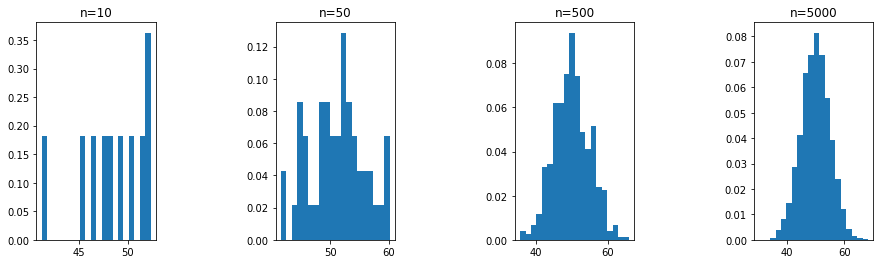

In [22]:
# Your code here
f, ax = plt.subplots(1, 4)

f.set_figwidth(15)

f.subplots_adjust(wspace=1)

for i in range(0, 4):
    ax[i].set_title('n=%s' % (sample_size[i]))
    count, bins, ignored = ax[i].hist(dists[i], 20, density=True)

#### Compare the distributions above. What do you observe? Explain with the Central Limit Theorem.

In [ ]:
# Your comment and explanation here
# El teorema describe la distribución de la media de una muestra aleatoria cuya población
# tiene una varianza finita. Así que si el tamaño de la muestra es lo suficientemente grande
# la distribución de las medias se aproxima a una distribución normal. 
# Esto se ve claramente en las gráficas, mientras n es mayor más se acerca a una distribución normal


# Challenge 2 - Plot Probability Mass Function (PMF)

#### Background knowledge

[PMF](https://en.wikipedia.org/wiki/Probability_mass_function) shows the probability distribution of a **discrete random variable**. A [discrete random variable](https://en.wikipedia.org/wiki/Random_variable#Discrete_random_variable) has random numeric values that are not continuous. For example, the number of people in a household can only be integers but not floats. Therefore the number of people in a household is a discrete variable.

#### Question: We assume that the probability of clicking an Ad in a Youtube video is 0.15. We have a sample of 5 people who wathched the video and we want to plot the PMF for a binomial distribution.

*Hint: use binom from `scipy.stats.binom`. Your output should look like below:*

![binom 10](ch-2.png)

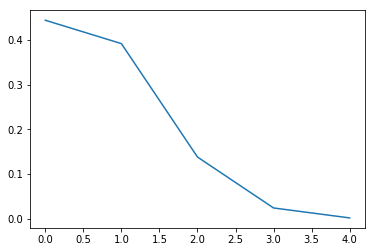

In [24]:
# Your code here
from scipy.stats import binom

n, p = 5, 0.15

x = range(n)

dist = binom(n, p)

fig, ax = plt.subplots(1, 1)

plt.plot(x, dist.pmf(x))

plt.show()

#### Explain what you observe from the plot above

In [ ]:
# Your comment here
# Con la muestra dada lo más probable es que nadie hará clic en el anuncio 

#### Now plot PMP with 50, 500, and 5000 visitors.

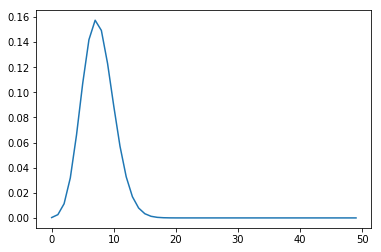

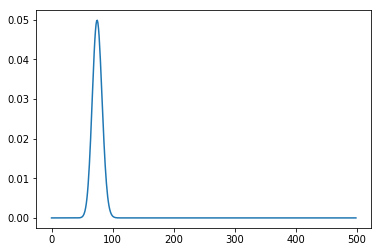

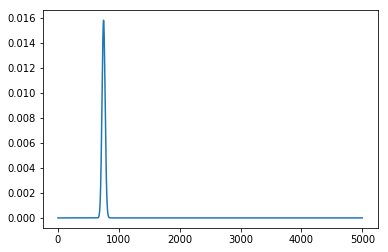

In [36]:
# Your code here
p = 0.15
def pmp(n, p):
    r = range(n)
    db = binom(n, p)
    fig, ax = plt.subplots(1, 1)
    plt.title = str(n) + ' Visitantes'
    plt.plot(r, db.pmf(r))
    
pmp(50, p)
pmp(500, p)
pmp(5000, p)

#### What did you notice from the distribution plots? Comment your findings.

In [ ]:
# Your comment here
# Mientras la muestra aumenta más se acerca a la probabilidad dada y a una distribución normal

# Challenge 3

#### Reaserch the Poisson distribution. Write about your own understanding of the Poisson distribution.

In [ ]:
# Your comment here
# Conociendo el valor promedio de que un evento ocurra en un intervalo de tiempo, con Poisson podemos
# conocer la probabilidad de que el evento ocurra un determinado número de veces en ese intervalo.

#### A website has an average of 300 visits per day. What is the probability of getting 320 visitors in a day?

*Hint: use `scipy.stats.poisson`*

In [44]:
# Your code here
from scipy.stats import poisson

rv = poisson(300)
rv.pmf(320)

0.011612348610402475

#### What is the probability of getting 60 visits?

In [45]:
# Your code here
rv = poisson(300)
rv.pmf(60)

2.622743762294515e-64

#### Plot the distribution of the probability for getting 0-1000 visits.

*Hints:* 

- Create a list to store the Poisson distribution probabilities for n=0 to 1000. Then plot the probabilities.

- Your plot should look like below:

![poisson distribution](ch-3.png)

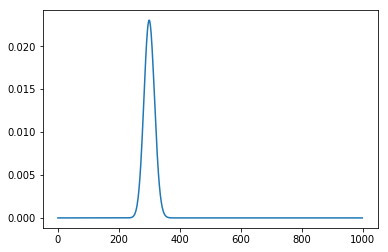

In [115]:
# your code here
from scipy.stats import poisson

N = np.arange(1000)

rv = poisson(300)

arr = []

for n in N:
    arr.append(rv.pmf(n))

plt.plot(arr)